## Observations and Insights 

After analyzing the data from the most recent animal study,from 249 mice identified with SCC tumor growth were treated through a variety of drug regimens. I found the Capomulin ,Ramicane and Ketaprilfrom are treatments throughout the course of the study  that had the most data points from total number of mice.

I found that the effectiveness of Capomulin drug regimen seems to be similar  to Ramicane drug regimen, this drug regimens are more effective than Infubinol and Ceftamine (see box plot of the Final Tumor Volume by Drug). In addition, there is only 1 outlier in this data set, and belongs to the drug trement Infubinol.

When I analysed the mouse treated with Capomulin, studyMouse s185, we can see that the treatment has possitive effectiveness with a reducion of the size of the tumor over the course of 45 days.

Finally,  there is a positive correlation between average tumor volume and weight within the subject mice, this case this sets of data have a correlation of 0.84, which means a strong linear correlation between average tumor volume and weight. 

In [70]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy import stats

# Study data files
mouse_metadata_path = "C:/Users/zaax/Desktop/BootCamp/Matplotlib/The Power of Plots/data/Mouse_metadata.csv"
study_results_path = "C:/Users/zaax/Desktop/BootCamp/Matplotlib/The Power of Plots/data/Study_results.csv"

    
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')
# Display the data table for preview
combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [71]:
# Checking the number of mice.
#mouse_count = combined_df['Mouse ID'].count()
#mouse_count
combined_df["Mouse ID"].nunique(dropna= True)

249

In [72]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
all_duplicate_rows=combined_df[combined_df.duplicated(['Mouse ID', 'Timepoint'], keep= False)]
print(all_duplicate_rows['Mouse ID'])

908    g989
909    g989
910    g989
911    g989
912    g989
913    g989
914    g989
915    g989
916    g989
917    g989
Name: Mouse ID, dtype: object


In [73]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicadesmauseid=combined_df.loc[combined_df['Mouse ID']=="g989"]
duplicadesmauseid

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [74]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df.drop_duplicates('Mouse ID')
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [75]:
# Checking the number of mice in the clean DataFrame.
mouse_count_clean = clean_df['Mouse ID'].count()-
mouse_count_clean

SyntaxError: invalid syntax (<ipython-input-75-37853bb2fb8d>, line 2)

## Summary Statistics

In [76]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
mean = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
standard_dv = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

summary_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": standard_dv, "SEM": sem})
summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [77]:
# Using Pandas to Chart a DataFrame
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
drug_data = pd.DataFrame(combined_df.groupby(["Drug Regimen"]).count()).reset_index()
#We need only to two columns
drugs_df = drug_data[["Drug Regimen", "Mouse ID"]]
drugs_df = drugs_df.set_index("Drug Regimen")
drugs_df

,Mouse ID
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,161
Ramicane,228
Stelasyn,181


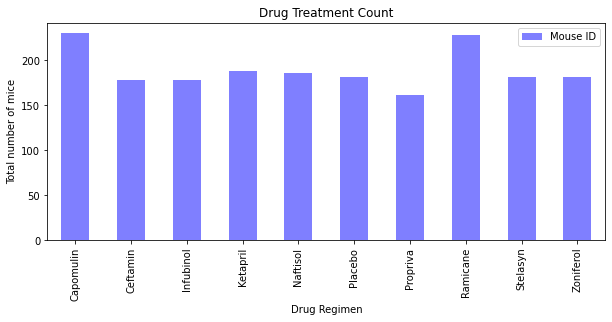

In [78]:
# Chart our data, give it a title, and label the axes
drugs_df.plot(kind="bar",color='b', alpha=0.5, align="center", figsize=(10,4))

plt.title("Drug Treatment Count")
plt.ylabel("Total number of mice")
plt.show()


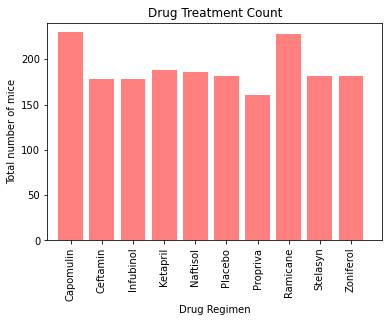

In [79]:
#Using MatplotLib to Chart a DataFrame 
#Generate a bar plot showing number of data points for each treatment regimen using pyplot
# Set x axis and tick locations
x_axis = np.arange(len(drugs_df))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drugs_df.index.values)
plt.bar(x_axis, drugs_df["Mouse ID"], color='r', alpha=0.5, align="center")

plt.xlim(-0.75, len(x_axis))
plt.ylim(0, max(drugs_df["Mouse ID"])+10)
# Rotate tick marks 90 degrees for visibility
plt.xticks(rotation=90)

# Set a Title and labels
plt.title("Drug Treatment Count")
plt.xlabel("Drug Regimen")
plt.ylabel("Total number of mice")
plt.show()

Text(0, 0.5, '')

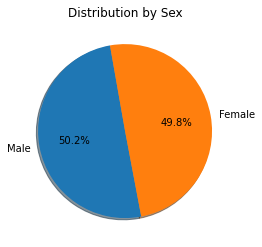

In [80]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Identify distribution of data by sex
data = clean_df['Sex'].value_counts()

# Plot a pie chart filled with corresponding percentages and displayed vertically
pie_plot = data.plot.pie(autopct="%1.1f%%", shadow=True, startangle=100, title='Distribution by Sex')

# Hide the 'y' label
pie_plot.set_ylabel('')

(-1.1682159660731721,
 1.107193254241077,
 -1.2295080256530446,
 1.110746532244119)

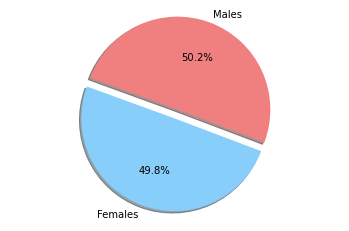

In [81]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Identify distribution of data by sex
gender_count = (clean_df.groupby(["Sex"])["Age_months"].count()).tolist()
#Adding details to the pie chart
labels = ["Females", "Males"]
colors = ["lightskyblue","lightcoral"]
explode = (0.1, 0)
plt.pie(gender_count, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=160)
plt.axis("equal")

## Quartiles, Outliers and Boxplots

In [82]:
# Start by getting the last (greatest) timepoint for each mouse
max_tp_df = pd.DataFrame(combined_df.groupby('Mouse ID')['Timepoint'].max().sort_values()).reset_index().rename(columns={'Timepoint': 'max_timepoint'})
max_tp_df    


,Mouse ID,max_timepoint
0,t573,0
1,u153,0
2,d133,0
3,n482,0
4,o848,0
...,...,...
244,k894,45
245,l471,45
246,l509,45
247,i177,45


In [83]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_max = pd.merge(combined_df, max_tp_df,on="Mouse ID")
merged_max

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,max_timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45
...,...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2,45
1889,z969,Naftisol,Male,9,30,30,65.841013,3,45
1890,z969,Naftisol,Male,9,30,35,69.176246,4,45
1891,z969,Naftisol,Male,9,30,40,70.314904,4,45


In [84]:
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
drug_values = []

# Locate each drug from our list 'drugs' in the orginal dataframe
for drug in drugs:
    
    temp_df = merged_max.loc[merged_max['Drug Regimen'] == drug]

    # Create subset dataframes that narrow down to rows only containing the final timepoint for each regimen
    final_volume_df = temp_df.loc[temp_df['Timepoint'] == temp_df['max_timepoint']]
    
    # Create a series that consists of all final volume values for each regimen
    values = final_volume_df['Tumor Volume (mm3)']
    drug_values.append(values)
    
    # Calculate and print the interquartile range (IQR) for each regimen
    quartiles = values.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f'IQR for {drug}: {iqr}')
    
    # Find upper and lower bounds to help identify outliers for each regimen
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f'Lower Bound for {drug}: {lower_bound}')
    print(f'Upper Bound for {drug}: {upper_bound}')
    
    # Quantitatively check for outliers
    outliers_count = (values.loc[(final_volume_df['Tumor Volume (mm3)'] >= upper_bound) | 
                                        (final_volume_df['Tumor Volume (mm3)'] <= lower_bound)]).count()
    print(f'Number of {drug} outliers: {outliers_count}')
    

IQR for Capomulin: 7.781863460000004
Lower Bound for Capomulin: 20.70456164999999
Upper Bound for Capomulin: 51.83201549
Number of Capomulin outliers: 0
IQR for Ramicane: 9.098536719999998
Lower Bound for Ramicane: 17.912664470000003
Upper Bound for Ramicane: 54.30681135
Number of Ramicane outliers: 0
IQR for Infubinol: 11.477135160000003
Lower Bound for Infubinol: 36.83290494999999
Upper Bound for Infubinol: 82.74144559000001
Number of Infubinol outliers: 1
IQR for Ceftamin: 15.577752179999997
Lower Bound for Ceftamin: 25.355449580000002
Upper Bound for Ceftamin: 87.66645829999999
Number of Ceftamin outliers: 0


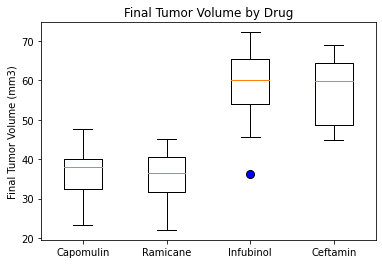

In [85]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
flierprops = dict(marker='o', markerfacecolor='b', markersize=8, markeredgecolor='black')

# Plot boxplot
plt.boxplot(drug_values, flierprops=flierprops)

# Add title and labels to boxplot
plt.title('Final Tumor Volume by Drug')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

plt.show()

## Line and Scatter Plots

In [86]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_df = combined_df.loc[combined_df["Drug Regimen"] == "Capomulin"]
capomulin_df = capomulin_df.reset_index()
capomulin_df.head()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,10,s185,Capomulin,Female,3,17,0,45.000000,0
1,11,s185,Capomulin,Female,3,17,5,43.878496,0
2,12,s185,Capomulin,Female,3,17,10,37.614948,0
3,13,s185,Capomulin,Female,3,17,15,38.177232,0
4,14,s185,Capomulin,Female,3,17,20,36.866876,0


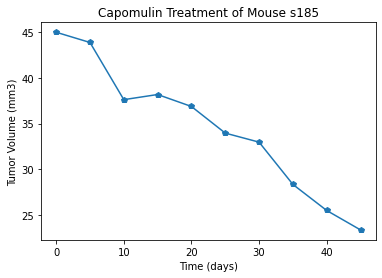

In [87]:
# Identify data points of a mouse treated with Capomulin
mouse = combined_df.loc[combined_df['Mouse ID'] == 's185']

# Plot a line chart with the time values on the x-axis and the tumor volume values on the y-axis
# marker = 'p' adds circles on each data point for visibility
plt.plot(mouse['Timepoint'], mouse['Tumor Volume (mm3)'], marker = 'p')

# Add labels and title to plot
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse s185")

# Display plot
plt.show()

In [88]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
# W need only  the Capomulin regimen
capomulin_df = combined_df.loc[combined_df['Drug Regimen'] == 'Capomulin']

# Find average tumor volume for each mouse

avg_vol_df = pd.DataFrame(capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'avg_tumor_vol'})
avg_vol_df

,Mouse ID,avg_tumor_vol
0,s185,34.559143
1,m601,34.847470
2,x401,36.182040
3,f966,36.505973
4,r554,36.509212
5,y793,38.506829
6,m957,39.049816
7,i738,39.141053
8,t565,39.328725
9,u364,39.887495


In [89]:
# Marge Data
avg_vol_dfmarge = pd.merge(capomulin_df, avg_vol_df, on='Mouse ID')
avg_vol_dfmarge

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,avg_tumor_vol
0,s185,Capomulin,Female,3,17,0,45.000000,0,34.559143
1,s185,Capomulin,Female,3,17,5,43.878496,0,34.559143
2,s185,Capomulin,Female,3,17,10,37.614948,0,34.559143
3,s185,Capomulin,Female,3,17,15,38.177232,0,34.559143
4,s185,Capomulin,Female,3,17,20,36.866876,0,34.559143
...,...,...,...,...,...,...,...,...,...
225,i557,Capomulin,Female,1,24,45,47.685963,1,44.805810
226,r157,Capomulin,Male,22,25,0,45.000000,0,45.798970
227,r157,Capomulin,Male,22,25,5,45.597064,0,45.798970
228,r157,Capomulin,Male,22,25,10,46.059608,0,45.798970


In [90]:
# Drop duplicates for the merge data
clean_avg_dfmarge = avg_vol_dfmarge[['Weight (g)', 'avg_tumor_vol']].drop_duplicates()
clean_avg_dfmarge


,Weight (g),avg_tumor_vol
0,17,34.559143
10,15,36.182040
20,17,34.847470
30,17,36.505973
35,17,39.887495
45,17,38.506829
55,17,36.509212
65,19,39.049816
75,17,39.328725
85,20,39.141053


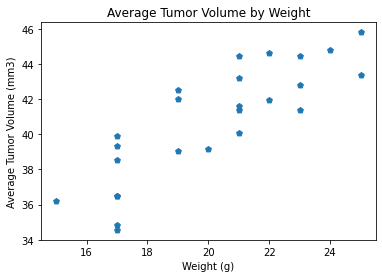

In [91]:
# Create a scatter plot based on new dataframe above with circle markers and listed colors
plt.scatter(clean_avg_dfmarge['Weight (g)'], clean_avg_dfmarge['avg_tumor_vol'], marker = 'p')

# Add labels and title to plot
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')
# Display plot
plt.show()

## Correlation and Regression

In [92]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Get values
x_values = clean_avg_dfmarge["Weight (g)"]
y_values = clean_avg_dfmarge["avg_tumor_vol"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)


0      37.777635
10     35.868756
20     37.777635
30     37.777635
35     37.777635
45     37.777635
55     37.777635
65     39.686515
75     37.777635
85     40.640954
95     41.595394
105    39.686515
115    39.686515
125    41.595394
135    42.549834
145    41.595394
153    43.504273
163    43.504273
166    41.595394
176    42.549834
186    43.504273
196    41.595394
206    45.413153
216    44.458713
226    45.413153
Name: Weight (g), dtype: float64


In [93]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.95x +21.55


The r-value is: 0.7088568047708721


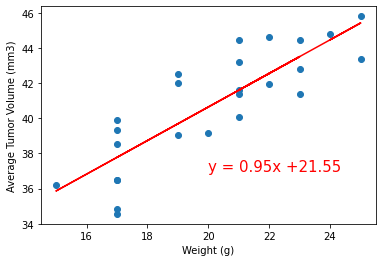

In [99]:
# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

# Annotate linear regression
plt.annotate(line_eq,(20,37),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

In [106]:
# We then compute the Pearson correlation coefficient between "Mouse Weight" and "Average Tumor Volume"
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between Mouse Weight and Average Tumor Volume is {round(correlation[0],2)}")

The correlation between Mouse Weight and Average Tumor Volume is 0.84
